In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [29]:
# params

loadLoc0 = "/scratch/hcm7920/amb0/data/"
loadLoc1 = "/scratch/hcm7920/amb100/data/"

nx = 500
ny = 500
nz = 50

In [30]:
# load data
data = nc.Dataset(loadLoc0+"diagsDynamics.nc")
vort = data["momVort3"]

In [31]:
# load other data
data = nc.Dataset(loadLoc1+"diagsDynamics.nc")
vort1=data["momVort3"]

Text(0.5, 1.0, 'Day 100 to 109 of 365, Max ice')

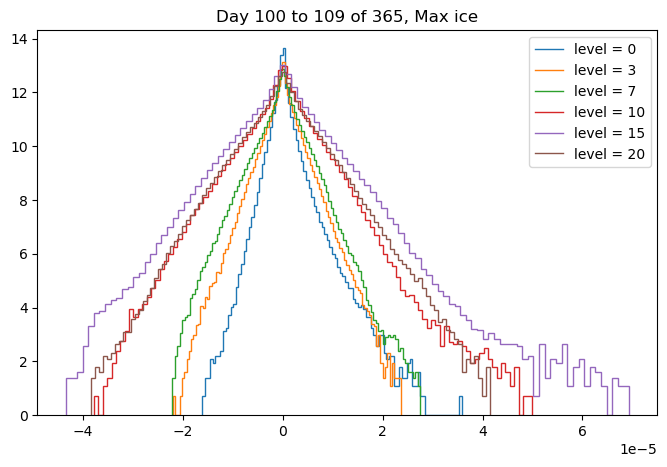

In [41]:
ts = 100
levs = [0,3,7,10,15,20]

plt.figure(figsize=(8,5))

for level in levs:
    hist, binEdges = np.histogram(vort1[ts:ts+10,level,:,:],bins=100)
    plt.stairs(np.log(hist+1),binEdges,label=f"level = {level}")
plt.legend()
plt.title(f"Day {ts} to {ts+9} of 365, Max ice")


Text(0.5, 1.0, 'Day 100 to 109 of 365, No ice')

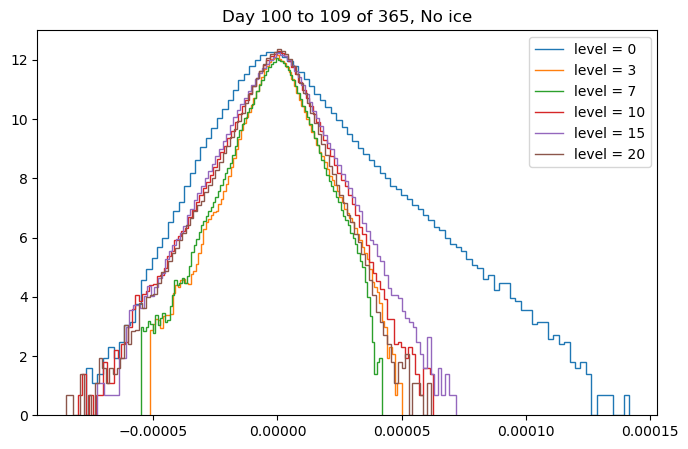

In [42]:
ts = 100
levs = [0,3,7,10,15,20]

plt.figure(figsize=(8,5))

for level in levs:
    hist, binEdges = np.histogram(vort[ts:ts+10,level,:,:],bins=100)
    plt.stairs(np.log(hist+1),binEdges,label=f"level = {level}")
plt.legend()
plt.title(f"Day {ts} to {ts+9} of 365, No ice")


Text(0.5, 1.0, '')

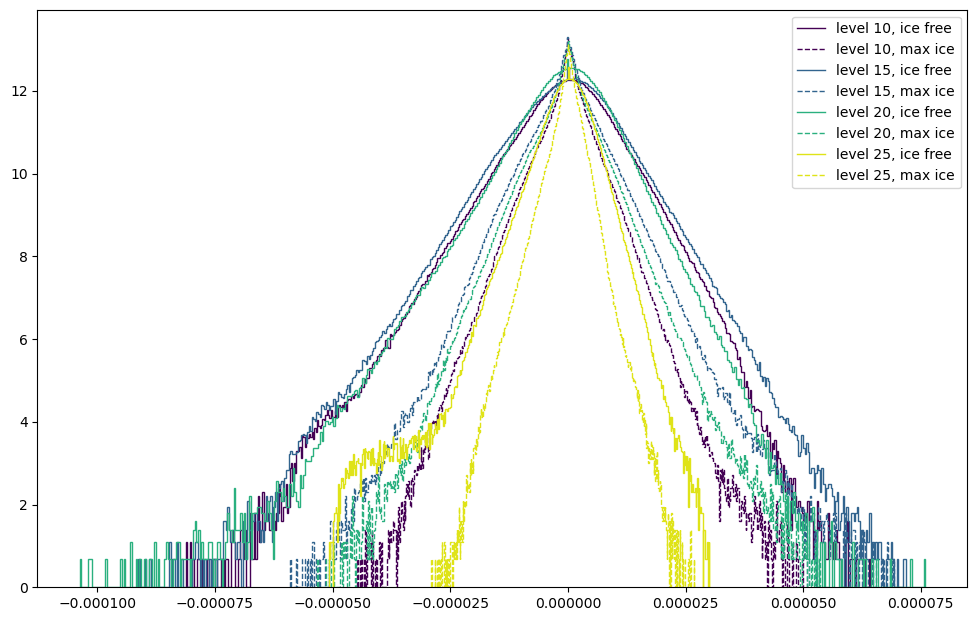

In [45]:
ts = 100
days = 50
levs = [10,15,20,25]
numBins = 500

colors = plt.cm.viridis(np.linspace(0,0.95,len(levs)))
plt.figure(figsize=(12,7.5))

for ix in range(len(levs)):
    level = levs[ix]
    
    hist, binEdges = np.histogram(vort[ts:ts+days,level,:,:],bins=numBins)
    plt.stairs(np.log(hist+1),binEdges, 
               label=f"level {level}, ice free",
               color=colors[ix], linestyle="solid")
    
    hist, binEdges = np.histogram(vort1[ts:ts+days,level,:,:],bins=numBins)
    plt.stairs(np.log(hist+1),binEdges, 
               label=f"level {level}, max ice",
               color=colors[ix], linestyle="dashed")
plt.legend()
plt.title(f"")
